# Análisis de textos

In [1]:
%pip install num2words
%pip install nltk

%pip install numpy, pandas, matplotlib, seaborn, sklearn, pydantic, inflect, gensim
%pip install pandas-profiling


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: 'numpy,'



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import num2words
import re, unicodedata, inflect
import nltk
from gensim.models import Word2Vec
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import (
    ConfusionMatrixDisplay, RocCurveDisplay,
    roc_auc_score, precision_score, recall_score, f1_score
)
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from pandas_profiling import ProfileReport


/home/leo/Documents/back-bi/backend-virtualenv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/tmp/ipykernel_140910/1941605045.py:26: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [3]:
import warnings
warnings.filterwarnings("ignore")

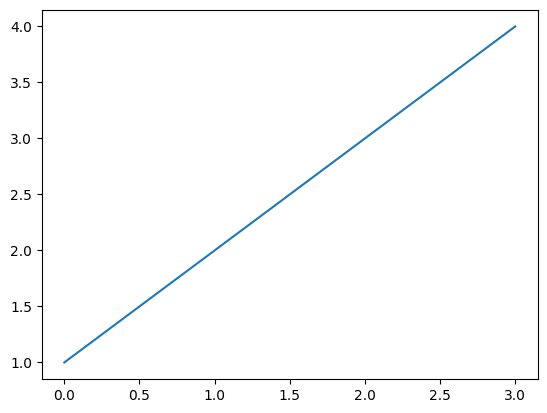

In [4]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4])

In [5]:
RECALL = "Recall:"
PRECISION = "Precision:"
F1 = "F1:"

In [6]:
# Configuring pandas to show all cell content
pd.set_option("display.max_colwidth", None)

In [7]:
# Downloading stopwords
nltk.download("punkt")
nltk.download("stopwords")
stop_words = stopwords.words("spanish")

[nltk_data] Downloading package punkt to /home/leo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/leo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
stop_words

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [9]:
ods_df = pd.read_csv("../data/cat_6716.csv")

In [10]:
ods_df.shape

(3000, 2)

In [11]:
ods_df.sample(5)

,Textos_espanol,sdg
2243,"El capítulo sostiene que los tratados internacionales de derechos humanos contienen obligaciones con implicaciones para la práctica del reconocimiento/no reconocimiento por parte de los Estados de otros Estados y gobiernos. Comienza explicando cómo se relacionan las obligaciones de los tratados internacionales de derechos humanos con las situaciones extraterritoriales y cómo podría aplicarse esto a la práctica del reconocimiento/no reconocimiento. A continuación, explica cómo se entiende la práctica del reconocimiento/no reconocimiento en el derecho internacional. A continuación, el capítulo aborda lo que las normas de los tratados de derechos humanos exigirían del reconocimiento/no reconocimiento. Por último, se examina la posible divergencia entre las obligaciones en materia de derechos humanos del Estado que reconoce/no reconoce y las obligaciones del objeto de dicho reconocimiento/no reconocimiento.",16
241,"Factores facilitadores que condujeron a la adopción de la reforma La contaminación del agua había ido aumentando lentamente como una preocupación para el público en general en la Unión Europea. En 1988, el Consejo de Ministros de Medio Ambiente solicitó a la Comisión Europea que trabajara en una directiva para abordar el problema de manera integral. Esto comenzó con las Directivas sobre Nitratos y Tratamiento de Aguas Residuales. En 1995, el Consejo de Ministros de Medio Ambiente y el comité medioambiental del Parlamento Europeo solicitaron a la Comisión de la UE que procediera con un enfoque más global de la política del agua.",6
2520,"El presente artículo analiza las particularidades de los derechos humanos dentro del sistema de salud, que se especializa en salud visual desde una perspectiva jurisdiccional poniendo énfasis en el contexto del ordenamiento jurídico ecuatoriano, con un enfoque de resultados concretos en la práctica médica para demostrar la interconexión que existe en todos los derechos humanos. Este es un trabajo vital que corresponde al sistema educativo para garantizar y desarrollar el mismo análisis sobre la conexión de los derechos humanos y el sistema educativo. Se utilizaron fundamentalmente los siguientes métodos científicos, el análisis-síntesis, el método sistémico, el método causal, la observación y el análisis de contenido.",16
951,"En 2000 se estableció un sistema de cofinanciación pública para algunas actividades de ONG ambientales. Una encuesta reciente encontró que solo el 19% de la población conocía el proceso de consulta pública sobre los planes de gestión bajo la Directiva Marco del Agua. La mitad de las personas entrevistadas expresó su intención de participar (Comisión Europea, 2009). Sería útil examinar formas de desarrollar una cultura de voluntariado en Luxemburgo.",6
1932,"Green MSP es ahora la voz público-privada aceptada de la región para la fabricación ecológica. Green tienen como objetivo impulsar el crecimiento de los fabricantes ecológicos locales a través de compras gubernamentales, implementar estándares e incentivos de construcción, alinear zonas industriales con activos ecológicos, proporcionar financiación a empresas emergentes y un programa de reconocimiento para fabricantes ecológicos. El modelo es un claro ejemplo de los esfuerzos de una región para expandir su base de fabricación ecológica. Es un buen modelo para coaliciones locales que desarrollan recomendaciones para crear sus propias economías verdes, pero puede ser más relevante para ciudades más grandes con esfuerzos de sostenibilidad más desarrollados, como Sydney.",7


In [12]:
ods_df["sdg"].value_counts(dropna=False, normalize=True)

sdg
6     0.333333
7     0.333333
16    0.333333
Name: proportion, dtype: float64

In [13]:
textos = ods_df.copy()
textos['Conteo'] = [len(x) for x in textos['Textos_espanol']]
textos['Moda'] = [pd.Series(x).value_counts().index[0] for x in textos['Textos_espanol']]
textos['Max'] = [[max([len(x) for x in i.split(' ')])][0] for i in textos['Textos_espanol']]
textos['Min'] = [[min([len(x) for x in i.split(' ')])][0] for i in textos['Textos_espanol']]

# Se realiza un perfilamiento de los datos con la librería pandas profiling
ProfileReport(textos)

ModuleNotFoundError: No module named 'ipywidgets'

In [14]:
ods_df["Textos_espanol"] = ods_df["Textos_espanol"].astype(str)

## Preparación de datos

Para poder realizar el pre-procesamiento de los datos, es recomendable pasar por tres etapas:
* Limpieza de los datos.
* Tokenización.
* Normalización.

<span style="color:red">!!! Antes de ver la solución, revisa alternativas para realizar las tres etapas previas.</span>

Para mayor información, pueden consultar el [siguiente artículo](https://medium.com/datos-y-ciencia/preprocesamiento-de-datos-de-texto-un-tutorial-en-python-5db5620f1767
).

### Limpieza de los datos

In [15]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    return [word.lower() for word in words]

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = num2words.num2words(int(word), lang='es')
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    return [word for word in words if word not in stop_words]

def preprocessing(words):
    words = to_lowercase(words)
    words = replace_numbers(words)
    words = remove_punctuation(words)
    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    return words

### Tokenización

In [16]:
ods_df["Textos_espanol"] = ods_df["Textos_espanol"].apply(word_tokenize).apply(preprocessing).apply(" ".join)
ods_df.sample(5)

,Textos_espanol,sdg
1970,contrario precios electricidad tienden ser mas altos vre estan produciendo menos suministro electricidad mercado estudios encuestados muestran valor mercado vre disminuye significativamente nivel penetracion dicha disminucion mas significativa energia solar fotovoltaica eolica generacion solar fotovoltaica concentra unas pocas horas dia resultados confirman diferencia precio carga base baja primer mw energia eolica solar fotovoltaica instalada oscilando 6 1 eur mwh dependiendo caracteristicas cada pais,7
1435,paises nordicos dinamarca finlandia suecia igual demas paises ue presentado nreap directiva energias renovables dinamarca comprometido objetivo treinta correspondiente dieciseis cero ktep energia renovable dos mil veinte preve dendroenergia constituya mil doscientos ktep cantidad total equivale ocho objetivo total,7
2912,tratados forman base mayor parte derecho internacional moderno sirven satisfacer necesidad fundamental regular consentimiento cuestiones interes comun traer estabilidad relaciones mutuas instrumento garantizar estabilidad fiabilidad orden relaciones internacionales tratados elementos mas importantes paz seguridad internacionales ello primeros tiempos historia derecho internacional tratados siempre sido fuente principal relaciones juridicas entidades hoy conocidas preambulo cvdt misma enfatiza papel fundamental tratados historia relaciones internacionales especialmente importancia tratados desarrollar cooperacion pacifica naciones importancia fundamental tratados resulto ser continuo mientras reglas procedimientos celebracion tratados asi contenido acuerdos internacionales cambiaron largo siglos,16
389,establecen adecuadamente tarifas agua cargos extraccion pueden informar extractores valor agua proporcionar incentivos usar agua manera eficiente incluso episodios sequia tambien pueden brindar incentivos dirigir desarrollos economicos urbanos regiones agua mas abundante evitando crear pasivos adicionales materia seguridad hidrica ver cuadro 35 tarifas agua cargos extraccion bien disenados tambien pueden estimular innovacion inversiones sector privado tecnologias practicas ahorro agua almacenamiento agua asignar agua crea mas valor social ambiental economico,6
27,plan lleva cabo comite nacional agua bajo autoridad ministro medio ambiente politicas destinadas reducir impacto contaminacion agricola recursos hidricos tambien llevan cabo colaboracion organismos dependientes ministerio medio ambiente onema agencias agua servicios desconcentrados ministerio medio ambiente etc ademas politica new start for fresh water dirigida conjuntamente ministerio medio ambiente ministerio agricultura bosques permite dos departamentos coordinar interfaz politicas agua agricultura nivel gobierno central,6


### Normalización

In [17]:
def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = nltk.stem.SnowballStemmer('spanish')
    stems = [stemmer.stem(word) for word in words]
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    #Lemmatize for spanish
    stemmer = nltk.stem.SnowballStemmer('spanish')
    lemmas = [stemmer.stem(word) for word in words]
    return lemmas
def stem_and_lemmatize(words):
    stems = stem_words(words)
    lemmas = lemmatize_verbs(words)
    return stems + lemmas

ods_df["Textos_espanol"] = ods_df["Textos_espanol"].apply(word_tokenize).apply(stem_and_lemmatize).apply(" ".join)
ods_df.sample(5)

,Textos_espanol,sdg
2364,aa resumenaest revisia3n evalu erudicia3n emergent cienci jurad polat cre tras decisia3n cort suprem unid bush v gor cas pus fin controversi electoral flor dos mil gor articul examin respuest academ cuatr pregunt central legal sol opinion mayoritari concurrent cort suprem b justific result cort suprem inclus si razon legal conten opinion sol c efect si hubier tendr cas investig cienci social estimul desarroll ley derech vot d dic resolucion cort bush v gor cort suprem institucion aa resumenaest revisia3n evalu erudicia3n emergent cienci jurad polat cre tras decisia3n cort suprem unid bush v gor cas pus fin controversi electoral flor dos mil gor articul examin respuest academ cuatr pregunt central legal sol opinion mayoritari concurrent cort suprem b justific result cort suprem inclus si razon legal conten opinion sol c efect si hubier tendr cas investig cienci social estimul desarroll ley derech vot d dic resolucion cort bush v gor cort suprem institucion,16
1853,dos mil catorc volum diari produccion electr pais alrededor 498 millon kwh inclu mas 86 millon kwh export afganist kirguist afganist recib mas 69 millon kwh electr dia kirguist alrededor 17 millon kwh segun inform tayikist suministr electr afganist kirguist sol period primaveraveran tabl 114 dos mil catorc volum diari produccion electr pais alrededor 498 millon kwh inclu mas 86 millon kwh export afganist kirguist afganist recib mas 69 millon kwh electr dia kirguist alrededor 17 millon kwh segun inform tayikist suministr electr afganist kirguist sol period primaveraveran tabl 114,7
1898,dos mil siet itali ofrec desgrav fiscal mejor eficient energet edifici existent inclu instal ventan dobl acristal aislamient termic calder alta eficient instal panel solar dos mil nuev propietari edifici present 240000 solicitud desgrav fiscal principi previst program finaliz dos mil diez numer solicitud dos mil diez super ano anterior cerc setent y uno dos mil siet itali ofrec desgrav fiscal mejor eficient energet edifici existent inclu instal ventan dobl acristal aislamient termic calder alta eficient instal panel solar dos mil nuev propietari edifici present 240000 solicitud desgrav fiscal principi previst program finaliz dos mil diez numer solicitud dos mil diez super ano anterior cerc setent y uno,7
1464,igual seccion anterior enfoqu herramient present abord vez dimension polit regulatori econom entorn propici inversion eficient energet pued gener import dividend econom inclu creacion emple menor exposicion volatil suministr energi menor vulner fluctuacion preci energi mayor competit industrial comercial polit tambi facilit coordin grup aument oportun inversion tecnologi eficient energet sector priv nacional internacional igual seccion anterior enfoqu herramient present abord vez dimension polit regulatori econom entorn propici inversion eficient energet pued gener import dividend econom inclu creacion emple menor exposicion volatil suministr energi menor vulner fluctuacion preci energi mayor competit industrial comercial polit tambi facilit coordin grup aument oportun inversion tecnologi eficient energet sector priv nacional internacional,7
2193,resum tras dec corrupt gobern poscolonial lider african reconoc colect buen gobern requisit previ renov afric exigi luch precedent corrupcion imper continent acta constitut union african acu inclu buen gobern objet principi buen gobern subraya3 aaon mas posterior instrument ua adopt marc nuev alianz desarroll afric nep mecan african revisia3n par aprm compromis lader ua luch corrupcia3n culmina3 adopcia3n convencia3n unia3n african preven combat corrupcia3n aucpcc mientr african prep conmemor primer dac adopcia3n aucpcc artacul reflexion cumplimient instrument part miembr ua ret perspect axit luch corrupcia3n sostien pes progres realiz lacr sig disminu resum tras dec corrupt gobern poscolonial lider african reconoc colect buen gobern requisit previ renov afric exigi luch precedent corrupcion imper continent acta co

# Entrenamiento

In [18]:
# The param 'stratify' is useful to guarantee label proportions on train and test sets
X_train, X_test, y_train, y_test = train_test_split(ods_df[["Textos_espanol"]], ods_df["sdg"], test_size=0.3, stratify=ods_df["sdg"], random_state=1)

In [19]:
X_train_tokens = [nltk.word_tokenize(text) for text in X_train]
X_test_tokens = [nltk.word_tokenize(text) for text in X_test]

In [20]:
X_train.shape, X_test.shape

((2100, 1), (900, 1))

In [21]:
pd.Series(y_train).value_counts(normalize=True)

sdg
7     0.333333
6     0.333333
16    0.333333
Name: proportion, dtype: float64

In [22]:
pd.Series(y_test).value_counts(normalize=True)

sdg
6     0.333333
7     0.333333
16    0.333333
Name: proportion, dtype: float64

## Text vectorization

In [23]:
bow = CountVectorizer(tokenizer=word_tokenize, stop_words=stop_words, lowercase=True)

In [24]:
X_bow = bow.fit_transform(X_train["Textos_espanol"])

In [25]:
print("Vocabulary size:", len(bow.vocabulary_))

Vocabulary size: 9820


In [26]:
tfidf = TfidfVectorizer(tokenizer=word_tokenize, stop_words=stop_words, lowercase=True)

In [27]:
X_tfidf = tfidf.fit_transform(X_train["Textos_espanol"])

In [28]:
print("Vocabulary size:", len(tfidf.vocabulary_))

Vocabulary size: 9820


## Training a model with BoW

In [29]:
bow_model = RandomForestClassifier(random_state=2)

In [30]:
bow_model.fit(X_bow, y_train)

RandomForestClassifier(random_state=2)

<Axes: >

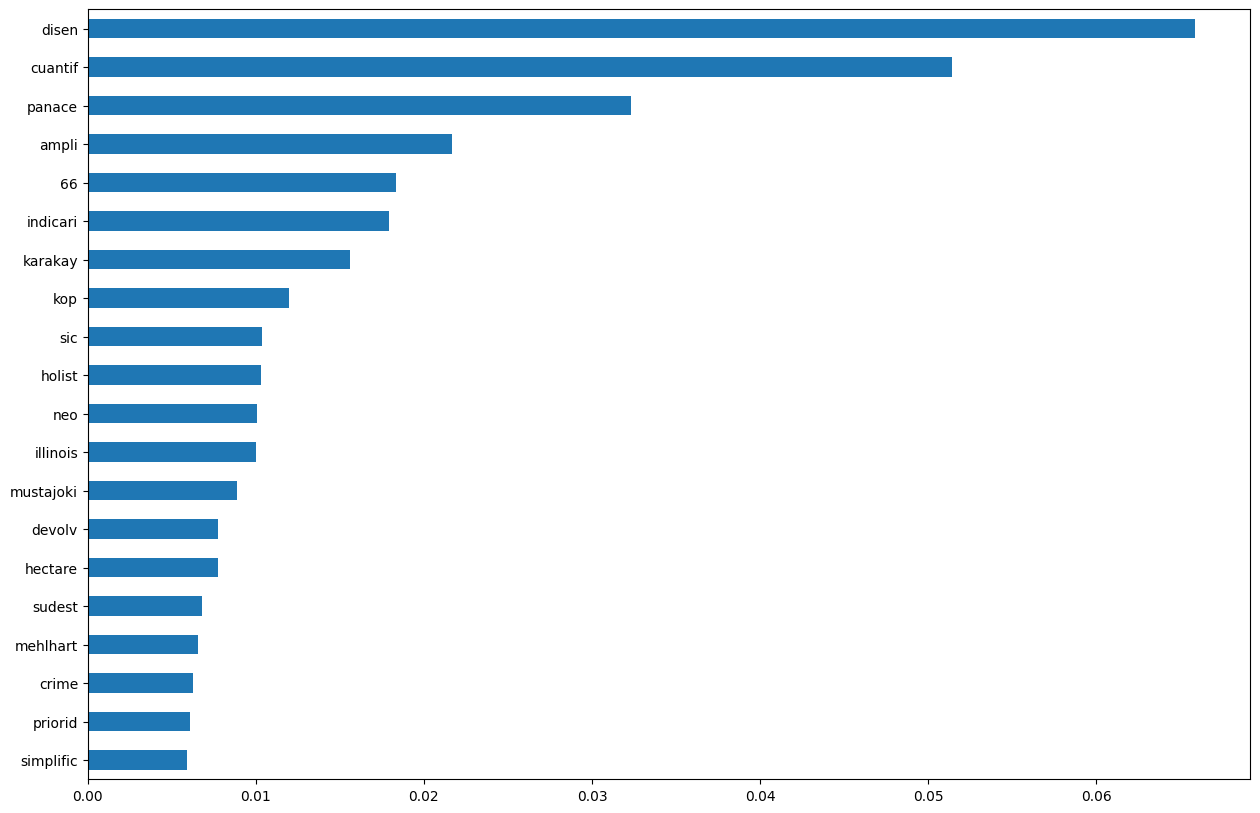

In [31]:
# Feature importance in tree models is an indicator on how relevant is a feature for taking the decision by the model
pd.Series(bow_model.feature_importances_, index=bow.vocabulary_).sort_values().tail(20).plot.barh(figsize=(15, 10))

In [32]:
bow_estimators = bow_model.estimators_
print("Number of trees:", len(bow_estimators))
print("Trees depth (mean):", np.mean([tree.get_depth() for tree in bow_estimators]))

Number of trees: 100
Trees depth (mean): 73.4


In [33]:
y_train_bow_predict = bow_model.predict(X_bow)
y_test_bow_predict = bow_model.predict(bow.transform(X_test["Textos_espanol"]))

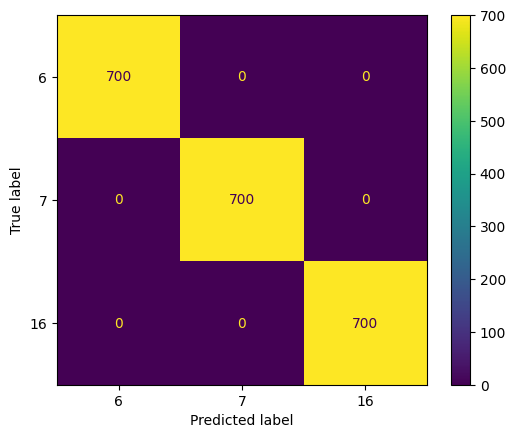

In [34]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_bow_predict)

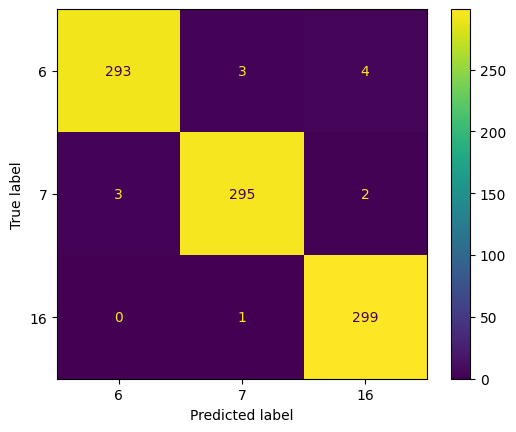

In [35]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_bow_predict)

In [36]:
print(PRECISION, precision_score(y_train, y_train_bow_predict, average="weighted"))
print(RECALL, recall_score(y_train, y_train_bow_predict, average="weighted"))
print(F1, f1_score(y_train, y_train_bow_predict, average="weighted"))

Precision: 1.0
Recall: 1.0
F1: 1.0


In [37]:
print(PRECISION, precision_score(y_test, y_test_bow_predict, average="weighted"))
print(RECALL, recall_score(y_test, y_test_bow_predict, average="weighted"))
print(F1, f1_score(y_test, y_test_bow_predict, average="weighted"))

Precision: 0.9856049357653064
Recall: 0.9855555555555555
F1: 0.9855420622799852


## Training a model with TF-IDF

In [38]:
tfidf_model = RandomForestClassifier(random_state=3)

In [39]:
tfidf_model.fit(X_tfidf, y_train)

RandomForestClassifier(random_state=3)

<Axes: >

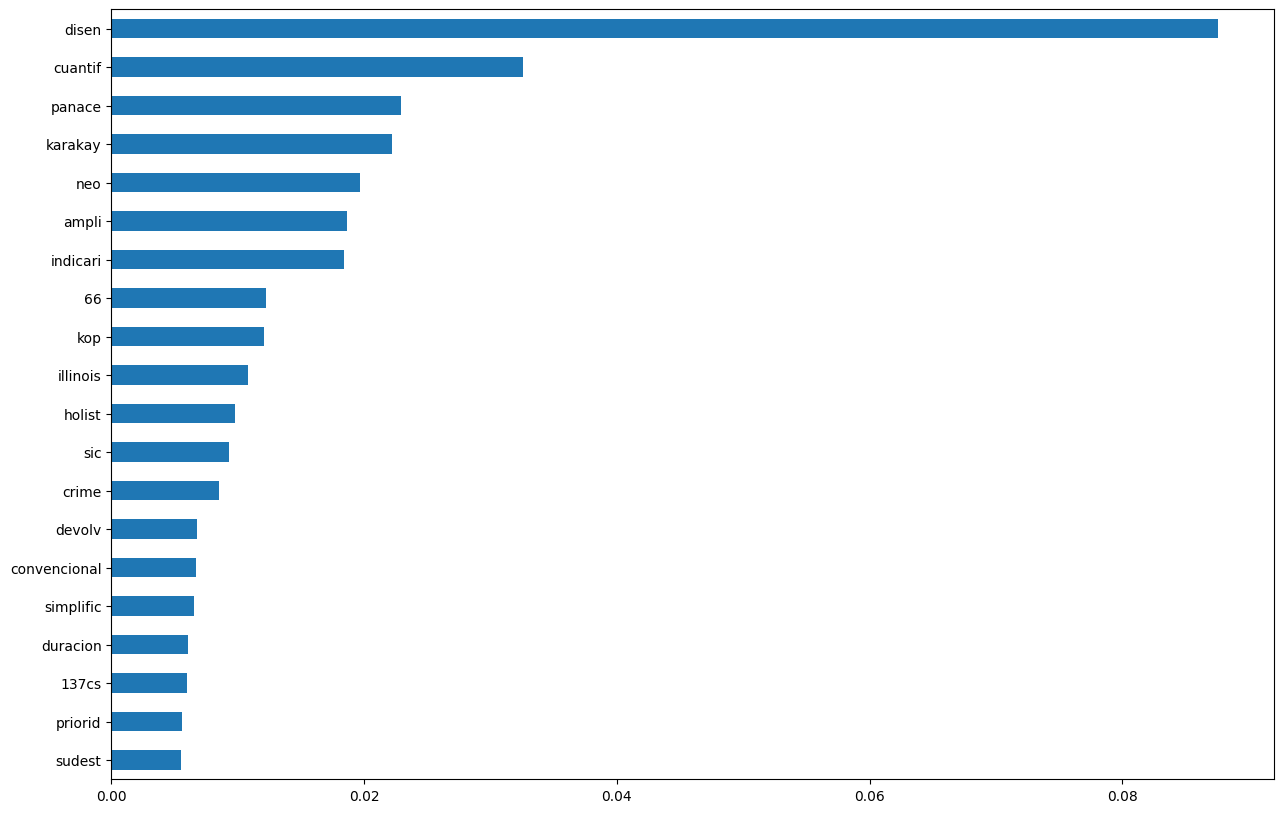

In [40]:
pd.Series(tfidf_model.feature_importances_, index=tfidf.vocabulary_).sort_values().tail(20).plot.barh(figsize=(15, 10))

In [41]:
tfidf_estimators = tfidf_model.estimators_
print("Number of trees:", len(tfidf_estimators))
print("Trees depth (mean):", np.mean([tree.get_depth() for tree in tfidf_estimators]))

Number of trees: 100
Trees depth (mean): 66.71


In [42]:
y_train_tfidf_predict = tfidf_model.predict(X_tfidf)
y_test_tfidf_predict = tfidf_model.predict(tfidf.transform(X_test["Textos_espanol"]))

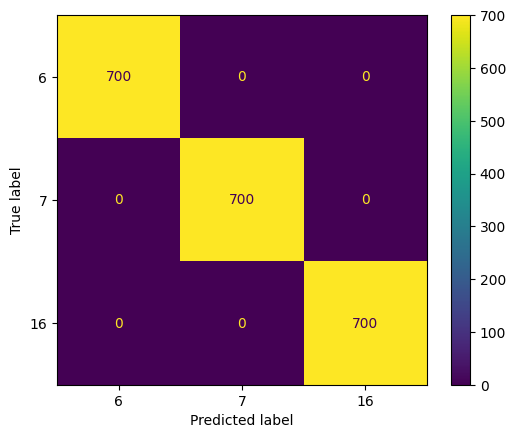

In [43]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_tfidf_predict)

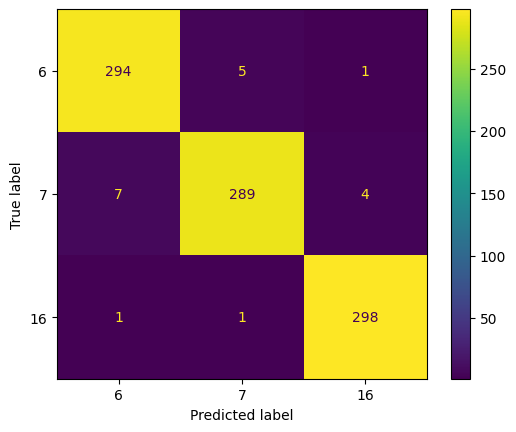

In [44]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_tfidf_predict)

In [45]:
print(PRECISION, precision_score(y_train, y_train_tfidf_predict, average="weighted"))
print(RECALL, recall_score(y_train, y_train_tfidf_predict, average="weighted"))
print(F1, f1_score(y_train, y_train_tfidf_predict, average="weighted"))

Precision: 1.0
Recall: 1.0
F1: 1.0


In [46]:
print(PRECISION, precision_score(y_test, y_test_tfidf_predict, average="weighted"))  
print(RECALL, recall_score(y_test, y_test_tfidf_predict, average="weighted"))
print(F1, f1_score(y_test, y_test_tfidf_predict, average="weighted"))

Precision: 0.9788897668529901
Recall: 0.9788888888888889
F1: 0.9788547113087204


## Training a model with SVM

In [47]:
# Vectorizar tus textos utilizando TF-IDF
tfidf_vectorizer = TfidfVectorizer(tokenizer=word_tokenize, stop_words=stop_words, lowercase=True)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train["Textos_espanol"])
X_test_tfidf = tfidf_vectorizer.transform(X_test["Textos_espanol"])


In [48]:
# Entrenar un modelo SVM
svm_classifier = SVC(kernel="linear", C=1)  # Puedes ajustar los hiperparámetros según sea necesario
svm_classifier.fit(X_train_tfidf, y_train)

SVC(C=1, kernel='linear')

In [49]:
coeficientes = abs(svm_classifier.coef_.toarray()[0]) 

In [50]:
nombres_caracteristicas = tfidf_vectorizer.get_feature_names_out()

In [51]:
df_coeficientes = pd.DataFrame({'Palabra': nombres_caracteristicas, 'Coeficiente': coeficientes})

In [52]:
df_coeficientes = df_coeficientes.sort_values(by='Coeficiente', key=np.abs, ascending=False)

In [53]:
palabras_importantes = df_coeficientes.head(10)

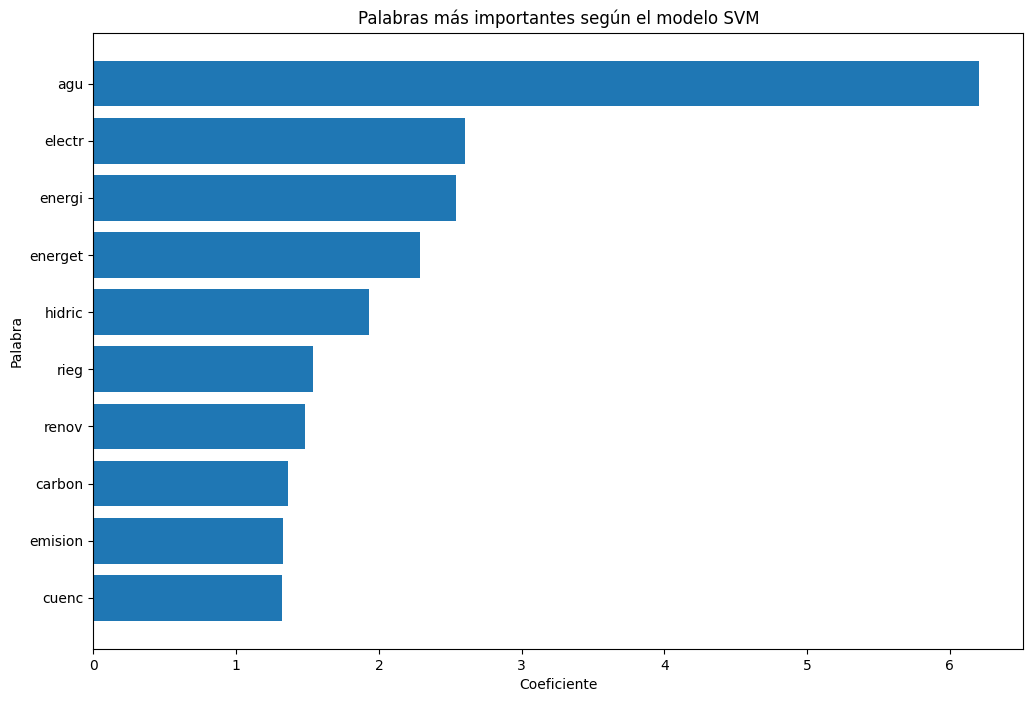

In [54]:
plt.figure(figsize=(12, 8))
plt.barh(palabras_importantes['Palabra'], palabras_importantes['Coeficiente'])
plt.xlabel('Coeficiente')
plt.ylabel('Palabra')
plt.title('Palabras más importantes según el modelo SVM')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar las palabras más importantes en la parte superior
plt.show()

In [55]:
# Realizar predicciones en el conjunto de prueba
y_pred = svm_classifier.predict(X_test_tfidf)


In [56]:
# Calcular las métricas para todo el conjunto de prueba
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

# Imprimir las métricas
print("Precisión promedio:", precision)
print("Recall promedio:", recall)
print("F1-score promedio:", f1)

Precisión promedio: 0.9845388963381154
Recall promedio: 0.9844444444444445
F1-score promedio: 0.9844136042852739


In [57]:
# Obtener predicciones en el conjunto de entrenamiento
y_train_pred_svm = svm_classifier.predict(X_train_tfidf)

# Calcular métricas de evaluación en el conjunto de entrenamiento
f1_svm_train = f1_score(y_train, y_train_pred_svm, average='weighted')
precision_svm_train = precision_score(y_train, y_train_pred_svm, average='weighted')
recall_svm_train = recall_score(y_train, y_train_pred_svm, average='weighted')

print("F1 Score en conjunto de entrenamiento (SVM):", f1_svm_train)
print("Precisión en conjunto de entrenamiento (SVM):", precision_svm_train)
print("Recall en conjunto de entrenamiento (SVM):", recall_svm_train)

F1 Score en conjunto de entrenamiento (SVM): 0.998095234207961
Precisión en conjunto de entrenamiento (SVM): 0.9980979436566828
Recall en conjunto de entrenamiento (SVM): 0.9980952380952381


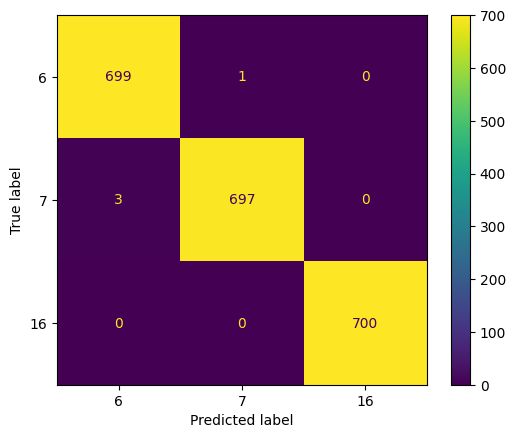

In [58]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred_svm)

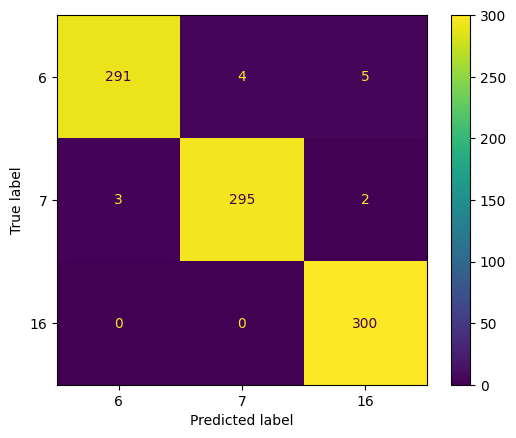

In [59]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

### Model selection

In [60]:
pipeline = Pipeline(steps = [
    ("vectorizer", CountVectorizer(tokenizer=word_tokenize, stop_words=stop_words, lowercase=True)),
    ("classifier", RandomForestClassifier(random_state=4)),
])

In [61]:
param_grid = {
    "vectorizer": [CountVectorizer(tokenizer=word_tokenize, stop_words=stop_words), TfidfVectorizer(tokenizer=word_tokenize, stop_words=stop_words)],
    "vectorizer__lowercase": [True, False],
    "classifier__n_estimators": [50, 100],
    "classifier__criterion": ['gini', 'entropy'],
    "classifier__max_depth": [25, 50, 75, 100], 
}


In [62]:
search = RandomizedSearchCV(pipeline, param_grid, n_iter=10, scoring=["precision", "recall", "f1"], refit="f1", cv=7, return_train_score=True, verbose=1, random_state=5)


In [63]:
search.fit(X_train["Textos_espanol"], y_train)

Fitting 7 folds for each of 10 candidates, totalling 70 fits


RandomizedSearchCV(cv=7,
                   estimator=Pipeline(steps=[('vectorizer',
                                              CountVectorizer(stop_words=['de',
                                                                          'la',
                                                                          'que',
                                                                          'el',
                                                                          'en',
                                                                          'y',
                                                                          'a',
                                                                          'los',
                                                                          'del',
                                                                          'se',
                                                                          'las',
                                                                          'por',
                                                                          'un',
                                                                          'para',
                                                                          'con',
                                                                          'no',
                                                                          'una',
                                                                          'su',
                                                                          'al',
                                                                          'lo',
                                                                          'como',
                                                                          'más',
                                                                          'pero',
                                                                          'sus',
                                                                          'le',
                                                                          'ya',
                                                                          'o',
                                                                          'este',
                                                                          'sí',
                                                                          'porque', ...],
                                                              tokenizer=<function word_tokenize at 0x7f045c18d4e0>)),
                                             ('classifier',
                                              RandomForestClassif...
                                                                                   'la',
                                                                                   'que',
                                                                                   'el',
                                                                                   'en',
                                                                                   'y',
                                                                                   'a',
                                                                                   'los',
                                                                                   'del',
                                                                                   'se',
                                                                                   'las',
                                                                                   'por',
                                                                                   'un',
                                                                                   'para',
                                                                                  

In [64]:
search.best_params_

{'vectorizer__lowercase': False,
 'vectorizer': CountVectorizer(stop_words=['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los',
                             'del', 'se', 'las', 'por', 'un', 'para', 'con',
                             'no', 'una', 'su', 'al', 'lo', 'como', 'más',
                             'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí',
                             'porque', ...],
                 tokenizer=<function word_tokenize at 0x7f045c18d4e0>),
 'classifier__n_estimators': 100,
 'classifier__max_depth': 100,
 'classifier__criterion': 'gini'}

In [65]:
search.best_score_

nan

In [66]:
y_train_search_predict = search.best_estimator_.predict(X_train["Textos_espanol"])
y_test_search_predict = search.best_estimator_.predict(X_test["Textos_espanol"])


In [67]:
print(PRECISION, precision_score(y_train, y_train_search_predict, average="weighted"))
print(RECALL, recall_score(y_train, y_train_search_predict, average="weighted"))
print(F1, f1_score(y_train, y_train_search_predict, average="weighted"))

Precision: 1.0
Recall: 1.0
F1: 1.0


In [68]:
print(PRECISION, precision_score(y_test, y_test_search_predict, average="weighted"))
print(RECALL, recall_score(y_test, y_test_search_predict, average="weighted"))
print(F1, f1_score(y_test, y_test_search_predict, average="weighted"))

Precision: 0.9822833889066245
Recall: 0.9822222222222222
F1: 0.9821860340725134


# Predicción y guardado de data

In [69]:
ods_df_unlabeled = pd.read_csv("../data/SinEtiquetatest_cat_6716.csv")
#Predict the labels of the unlabeled data
y_unlabeled_predict = search.best_estimator_.predict(ods_df_unlabeled["Textos_espanol"])
#Add the predicted labels to the unlabeled data
ods_df_unlabeled["sdg"] = y_unlabeled_predict
#Save the labeled data
ods_df_unlabeled.to_csv("../data/Predicted.csv", index=False)
